<a href="https://colab.research.google.com/github/RenzoAlvaroshan/Tensorflow-Tutorial/blob/master/TF_2_0_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [0]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [0]:
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [0]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 20s 11ms/step - loss: 0.5241 - accuracy: 0.8054 - val_loss: 0.4013 - val_accuracy: 0.8478
Epoch 2/15
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3646 - accuracy: 0.8629 - val_loss: 0.3435 - val_accuracy: 0.8735
Epoch 3/15
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3155 - accuracy: 0.8812 - val_loss: 0.3340 - val_accuracy: 0.8752
Epoch 4/15
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2794 - accuracy: 0.8964 - val_loss: 0.3118 - val_accuracy: 0.8886
Epoch 5/15
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2542 - accuracy: 0.9032 - val_loss: 0.3081 - val_accuracy: 0.8874
Epoch 6/15
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2326 - accuracy: 0.9122 - val_loss: 0.2953 - val_accuracy: 0.8965
Epoch 7/15
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2116 - accuracy: 0.9191 - val_loss: 0.3077 -

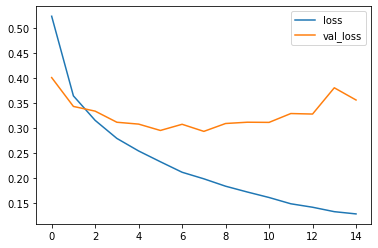

In [0]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

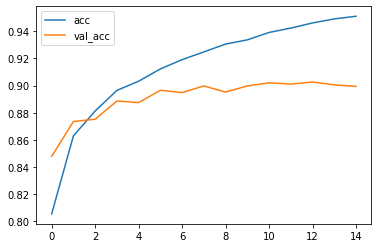

In [0]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion Matrix, without normalization
[[883   1  23  15   3   1  67   0   7   0]
 [  3 977   1  12   2   0   2   0   3   0]
 [ 25   0 862   9  47   0  55   0   2   0]
 [ 26  15  14 911  19   1  14   0   0   0]
 [  2   0  62  25 776   0 133   0   2   0]
 [  0   0   0   0   0 953   0  34   1  12]
 [119   3  60  29  54   0 729   0   6   0]
 [  0   0   0   0   0   6   0 978   0  16]
 [  3   2   2   3   4   1   6   2 976   1]
 [  1   0   0   0   0   5   0  45   0 949]]


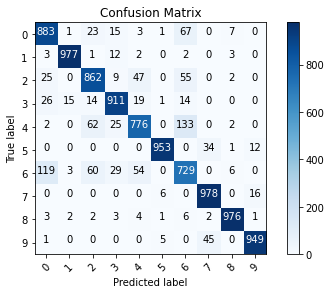

In [0]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Confusion Matrix with normalization')
  else:
    print('Confusion Matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [0]:
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

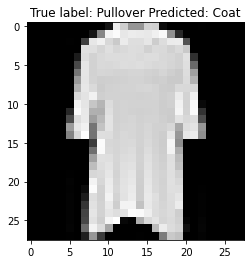

In [0]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));